In [1]:
#Data Analysis 
import pyspark
import pandas as pd
import numpy as np

In [2]:
#Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#Machine Learning

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
#Read data

df = pd.read_csv("/dbfs/FileStore/tables/ks_projects_201612-284ce.csv", encoding= 'cp1252', low_memory = False)
df.head()

Out[ 5 ]: 
 ID name \
0 1000002330 The Songs of Adelaide & Abullah 
1 1000004038 Where is Hank? 
2 1000007540 ToshiCapital Rekordz Needs Help to Complete Album 
3 1000011046 Community Film Project: The Art of Neighborhoo... 
4 1000014025 Monarch Espresso Bar 

 category main_category currency deadline goal \
0 Poetry Publishing GBP 2015-10-09 11:36:00 1000 
1 Narrative Film Film & Video USD 2013-02-26 00:20:50 45000 
2 Music Music USD 2012-04-16 04:24:11 5000 
3 Film & Video Film & Video USD 2015-08-29 01:00:00 19500 
4 Restaurants Food USD 2016-04-01 13:38:27 50000 

 launched pledged state backers country usd pledged \
0 2015-08-11 12:12:28 0 failed 0 GB 0 
1 2013-01-12 00:20:50 220 failed 3 US 220 
2 2012-03-17 03:24:11 1 failed 1 US 1 
3 2015-07-04 08:35:03 1283 canceled 14 US 1283 
4 2016-02-26 13:38:27 52375 successful 224 US 52375 

 Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16 
0 NaN NaN NaN NaN 
1 NaN NaN NaN NaN 
2 NaN NaN NaN NaN 
3 NaN NaN NaN NaN 
4 NaN NaN NaN NaN

In [5]:
categorical_with_per_count(df, 'state')

Out[ 73 ]: 
 state_% state_count
failed 53.850196 131157
successful 46.149804 112402

In [6]:
#Strip out while spaces 
df.columns = [x.strip() for x in df.columns.tolist()]

#Check 'name' column, 'category' column, and 'ID' contain Null value

df[(df['name'].isnull()) | (df['category'].isnull()) | (df['ID'].isnull())]

Out[ 6 ]: 
 ID name \
36671 1218074363 I am Rupert 
41069 124438738 BlanketPals TM 
63544 1378236004 {string&&loop} Knitting Craft with Code 
96753 1574873938 American Pin-up Revisitedd 
265251 648853978 NaN 
269930 676846639 Uplift: The Wearable iPhone Case with Zipline&... 
289847 796533179 NaN 

 category main_category currency deadline \
36671 NaN Webseries Film & Video GBP 
41069 NaN Interactive Design Design USD 
63544 NaN Apparel Fashion USD 
96753 NaN Art Art USD 
265251 Product Design Design USD 2016-07-18 05:01:47 
269930 NaN Design Design USD 
289847 Painting Art USD 2011-12-05 05:59:00 

 goal launched pledged \
36671 2014-05-16 22:25:57 2000 2014-03-27 21:25:57 
41069 2015-03-25 20:51:48 9750 2015-02-23 21:51:48 
63544 2016-05-28 00:00:00 1800 2016-04-29 21:04:40 
96753 2014-04-03 17:52:09 7500 2014-03-04 17:52:09 
265251 2500 2016-06-18 05:01:47 0 
269930 2011-04-04 20:08:17 50000 2011-03-05 20:08:17 
289847 35000 2011-11-06 23:55:55 220 

 state backers country usd pledged Unnamed: 13 Unnamed: 14 \
36671 5 failed 1 GB 8.26779725 NaN 
41069 10890.45 successful 107 US 10890.45 NaN 
63544 2308 successful 119 US 2308 NaN 
96753 100 failed 1 US 100 NaN 
265251 suspended 0 US 0 NaN NaN 
269930 1665 canceled 10 US 1665 NaN 
289847 failed 5 US 220 NaN NaN 

 Unnamed: 15 Unnamed: 16 
36671 NaN NaN 
41069 NaN NaN 
63544 NaN NaN 
96753 NaN NaN 
265251 NaN NaN 
269930 NaN NaN 
289847 NaN NaN

In [7]:
#Drop all the rows that contain Null value
df = df.dropna(axis=0, subset=['ID', 'name', 'category'])

#Delete last four columns
df = df.iloc[:,:-4]

df.head()

Out[ 7 ]: 
 ID name \
0 1000002330 The Songs of Adelaide & Abullah 
1 1000004038 Where is Hank? 
2 1000007540 ToshiCapital Rekordz Needs Help to Complete Album 
3 1000011046 Community Film Project: The Art of Neighborhoo... 
4 1000014025 Monarch Espresso Bar 

 category main_category currency deadline goal \
0 Poetry Publishing GBP 2015-10-09 11:36:00 1000 
1 Narrative Film Film & Video USD 2013-02-26 00:20:50 45000 
2 Music Music USD 2012-04-16 04:24:11 5000 
3 Film & Video Film & Video USD 2015-08-29 01:00:00 19500 
4 Restaurants Food USD 2016-04-01 13:38:27 50000 

 launched pledged state backers country usd pledged 
0 2015-08-11 12:12:28 0 failed 0 GB 0 
1 2013-01-12 00:20:50 220 failed 3 US 220 
2 2012-03-17 03:24:11 1 failed 1 US 1 
3 2015-07-04 08:35:03 1283 canceled 14 US 1283 
4 2016-02-26 13:38:27 52375 successful 224 US 52375

In [8]:
#Check 30 top main categories
m = df.main_category.value_counts().head(30)
print(m)

Film & Video 57679
Music 46744
Publishing 34233
Games 28008
Technology 26128
Art 23973
Design 23870
Food 21229
Fashion 18398
Theater 9972
Photography 9680
Comics 8753
Crafts 7187
Journalism 4073
Dance 3375
Fiction 35
Product Design 29
Documentary 28
Nonfiction 27
Children's Books 18
Tabletop Games 14
Shorts 13
Video Games 12
Mixed Media 11
Art Books 10
Apparel 9
Narrative Film 8
Web 8
Indie Rock 7
Hip-Hop 7
Name: main_category, dtype: int64

In [9]:
dims = (10, 8)
fig, ax = plt.subplots(figsize = dims)

# barplot of the main categories by descending order
sns.countplot(
    y=df.main_category,
    order = df['main_category'].value_counts().index
)


Out[ 69 ]: <matplotlib.axes._subplots.AxesSubplot at 0x7fb251523ad0>

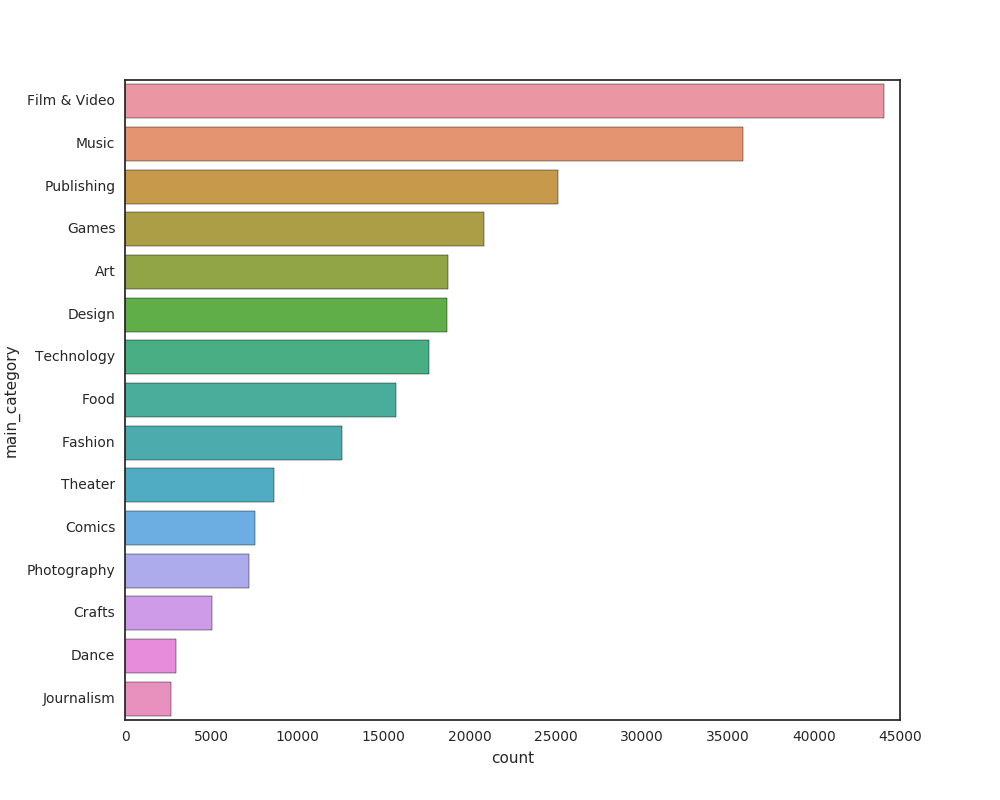

In [10]:
display(fig)

In [11]:
c = df.currency.value_counts().head(5)

In [12]:
labels = c.index
sizes = c.values

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue']
explode = (0, 0, 0, 0, 0)  # explode 1st slice

fig, ax = plt.subplots()
plt.title('Top 5 Currencies in Kickstarter', fontsize=20)
patches, texts = plt.pie(sizes, labels = labels, startangle=210)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

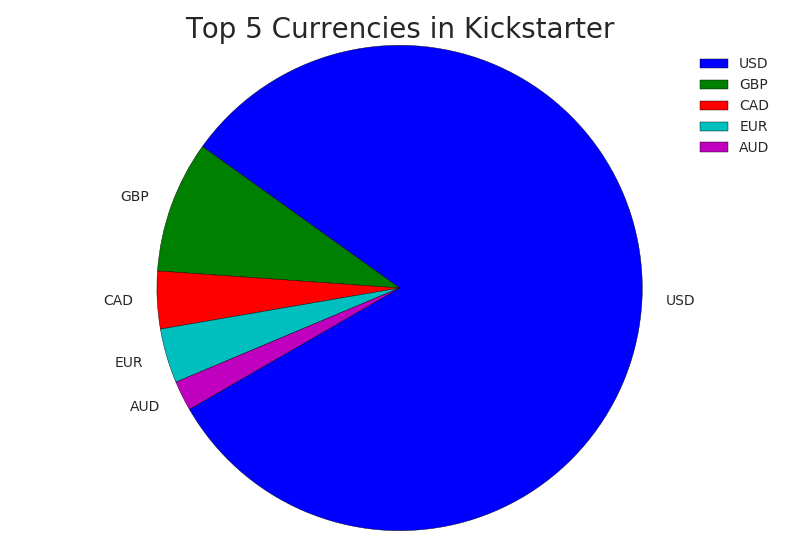

In [13]:
display(fig)

In [14]:
#Data cleaning
df[~df.country.str.contains('^[A-Z]{2}$', case=False)].country.value_counts()
replace = df[~df.country.str.contains('^[A-Z]{2}$', case=False)].country.unique().tolist()
df.loc[:,'country'] = df.country.replace(to_replace=replace, value='None')

In [15]:
m = df.country.value_counts().head(10)

In [16]:
# top 10 the most frequent country
categorical_with_per_count(df, 'country').head(n=10)

Out[ 71 ]: 
 country_% country_count
US 82.503623 200945
GB 8.343769 20322
CA 3.312544 8068
AU 1.732229 4219
DE 0.672527 1638
NL 0.602318 1467
FR 0.507885 1237
IT 0.409757 998
SE 0.360898 879
NZ 0.345707 842

In [17]:
sns.set_style('white')

x = m.values
y = m.index

fig, ax = plt.subplots()
ax = sns.barplot(y=y, x=x, palette="hls", alpha=0.5)

plt.title('Kickstarter Top 10 Country Count', fontsize=20)
plt.show()

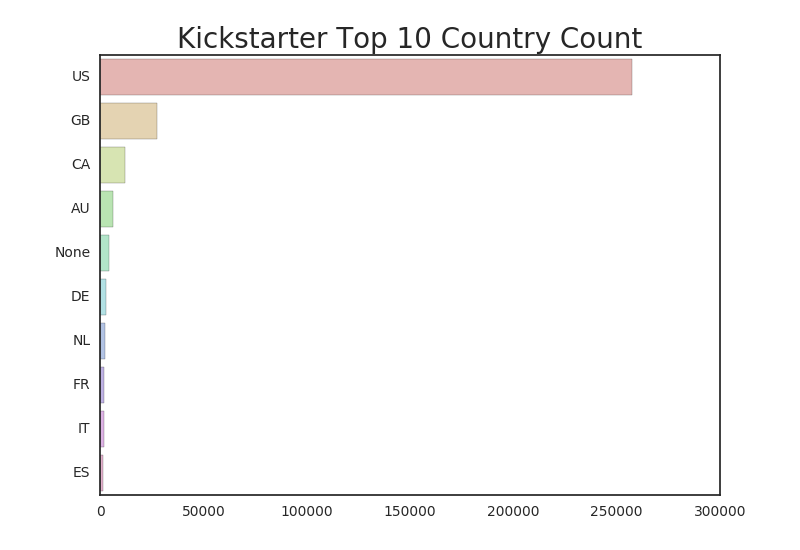

In [18]:
display(fig)

In [19]:
#Convert str to float
df['goal'] = pd.to_numeric(df.goal, downcast='float', errors='coerce')
df.loc[:,'usd pledged'] = pd.to_numeric(df['usd pledged'], downcast='float', errors='coerce')

#Convert datetime
for col in ['launched', 'deadline']:
    df.loc[:,col] = pd.to_datetime(df[col], errors='coerce')

#Drop all Null Values 
df = df.dropna()


df = df.rename(index=str, columns={'usd pledged': 'usd_pledged'})
df = df[df.usd_pledged > 0]


In [20]:
features = df.copy()

#Rename Column

features = features.rename(index=str, columns={'usd pledged': 'usd_pledged'})
features.columns


Out[ 19 ]: 
Index([ u'ID', u'name', u'category', u'main_category',
 u'currency', u'deadline', u'goal', u'launched',
 u'pledged', u'state', u'backers', u'country',
 u'usd_pledged'],
 dtype='object')

In [21]:
features['length_chars'] = features.name.str.len()
features['contains_!'] = pd.get_dummies(features.name.str.contains('!'), drop_first=True)
features['contains_?'] = pd.get_dummies(features.name.str.contains(r'\?'), drop_first=True)
features['contains_title'] = pd.get_dummies(features.name.str.istitle(), drop_first=True)
features['US'] = np.where(features.country=='US', 1,0)
features['success'] = np.where(features.state == 'successful', 1, 0)
features['log_goal'] = np.log10(features.goal)
features['log_usd_pledged'] = np.log10(features.usd_pledged)
features['time_delta'] = (features.deadline.dt.date - features.launched.dt.date).dt.days


In [22]:
sns.set_style('darkgrid')

fig, ax = plt.subplots()
sns.distplot(features.log_goal, kde=False, bins=20)

plt.title('Distribution of Goal')
plt.plot()

Out[ 21 ]: []

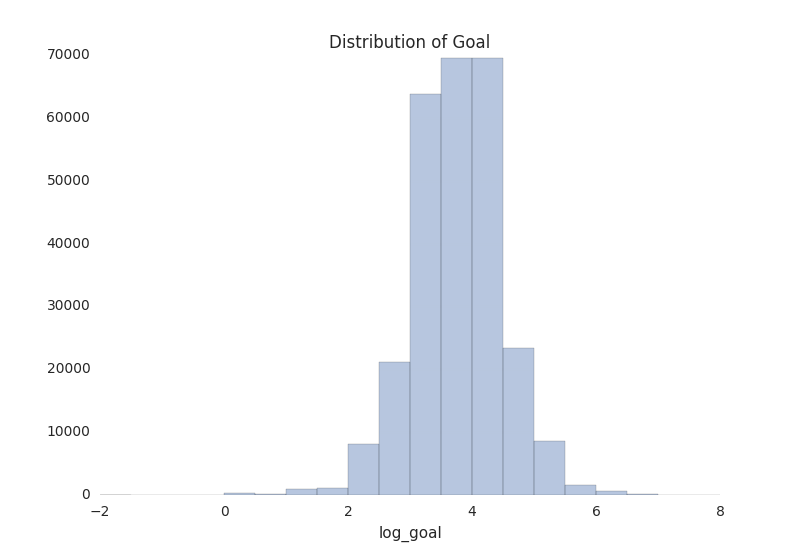

In [23]:
display(fig)

In [24]:
features = pd.concat([features, 
                      pd.get_dummies(features.launched.dt.dayofweek, prefix='day_of_week'),
                     pd.get_dummies(features.launched.dt.week, prefix='week'),
                     pd.get_dummies(features.launched.dt.year, prefix='year'),
                     pd.get_dummies(features.category)],
         axis=1)

In [25]:
features = features.iloc[:,15:]
sns.heatmap(features.iloc[:, :20].corr(), cmap='Blues')

fig, ax = plt.subplots()
plt.title('Heatmap of Kickstarter Feature Correlations')
plt.show()

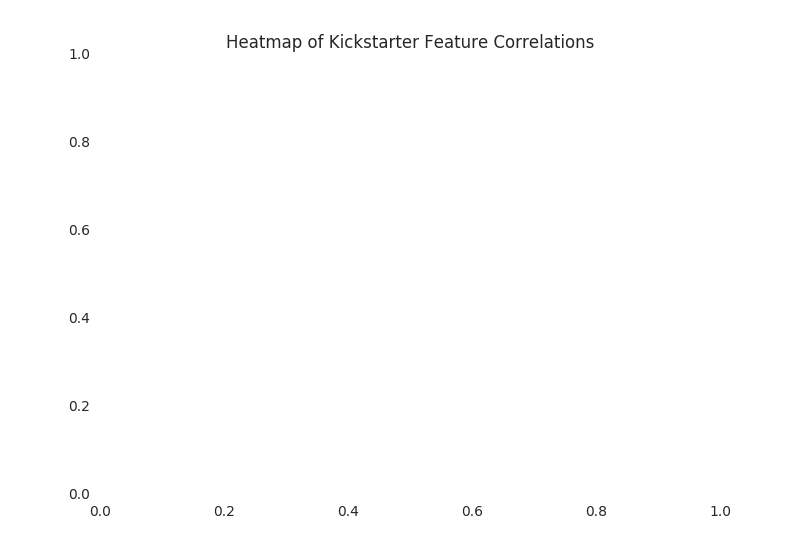

In [26]:
display(fig)

In [27]:
#There is a strong correlation between log_usd_pledged and success
#Weak negative correlation betwen contains title and length_chars.
#Weak negative correlation between log_goal and success.
#Weak positive correlation log goal, time_delta, and usd_pledged.
#Try Linear Regression model to predict Log USD Pledged

In [28]:
from sklearn import linear_model

# Instantiate and fit our model.
regression = linear_model.LinearRegression()
Y = features[('log_usd_pledged')]
X = features.drop(['log_usd_pledged', 'success'], axis=1)
regression.fit(X, Y)

# Inspect the results.
# print('\nCoefficients: \n', regression.coef_)
print('\nIntercept: \n', regression.intercept_)
print('\nR-squared:')
print(regression.score(X, Y))

('\nIntercept: \n', 196.28354426398886)

R-squared:
0.165574713199

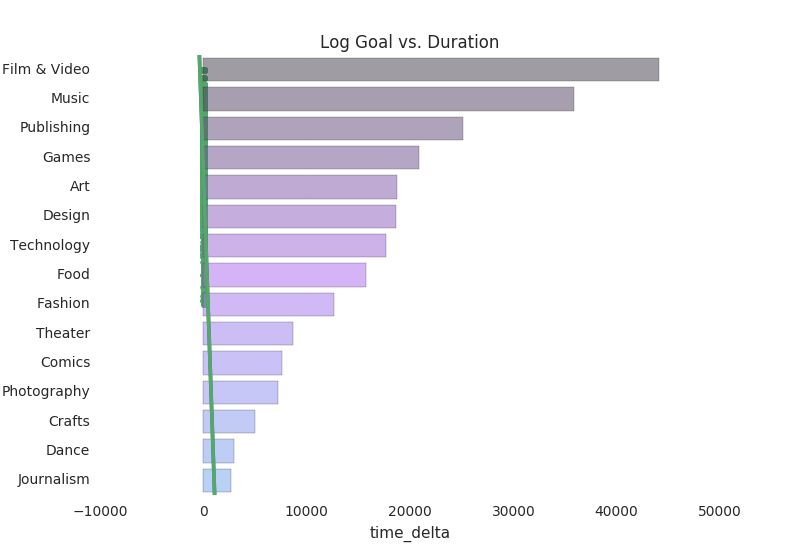

In [29]:
sns.regplot(x='time_delta', y='log_goal', data=features)
plt.title('Log Goal vs. Duration')
display(plt.show())

In [30]:
#As the amount predicted increases the residual error increases.

In [31]:
# Drop Log USD Pledged
features = features.drop(['log_usd_pledged'], 1)

#Set Traing and Testing data
X = features.drop(['success'], 1)
y = features.success

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [32]:
#PCA

In [33]:
X_pca = features.drop('success', 1)
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X_pca)
print('The percentage of total variance in the dataset explained by each','component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

('The percentage of total variance in the dataset explained by each', 'component from Sklearn PCA.\n', array([ 0.9729508 , 0.00305316, 0.00136175, 0.00131213, 0.00118977]))

In [34]:
#Machine Learning Model #1

In [35]:
rf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=100)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)

print('Random Forest Testing Accuracy: {:.4f}'.format(rf_score))

Random Forest Testing Accuracy: 0.6704

In [36]:
#Machin Learning Model #2 Logistic Regression

In [37]:
lr = LogisticRegression(penalty='l2', solver='liblinear')
fit = lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

print('Logistic Regression Testing Accuracy: {:.4f}'.format(lr_score))

Logistic Regression Testing Accuracy: 0.6721

In [38]:
#Machin Learning Model 3 AdaBoost

In [39]:
#The SAMME.R algorithm achieving a lower test error with fewer boosting iterations.

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME.R",n_estimators=100)
ada.fit(X_train, y_train)
ada_score= ada.score(X_test, y_test)

print('AdaBoost Testing Accuracy: {:.4f}'.format(ada_score))


AdaBoost Testing Accuracy: 0.6732

In [40]:
#Machine Learning Model 4 KNN Clustering

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn.fit(X_train, y_train)
knn_score = (knn.score(X_test, y_test))

print('KNN-Clustering Testing Accuracy: {:.4f}'.format(knn_score))

KNN-Clustering Testing Accuracy: 0.6188

In [42]:
#Compare all the Accuracy of 4 models 

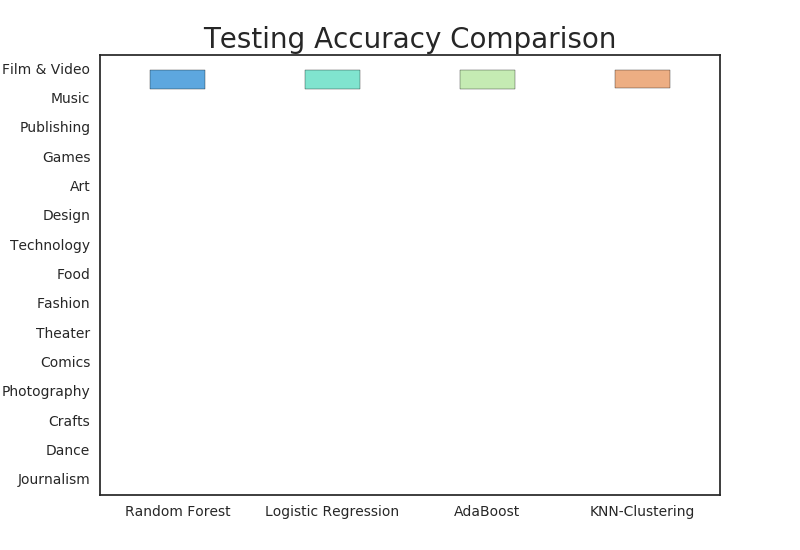

In [43]:
x = ['Random Forest', 'Logistic Regression', 'AdaBoost', 'KNN-Clustering']
y = [rf_score, lr_score, ada_score, knn_score]

ax = sns.barplot(y=y, x=x, palette="rainbow", alpha=0.8)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.title('Testing Accuracy Comparison', fontsize=20)
display(plt.show())